# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep:26     |  |
| :-------------|:-------------|
| Fynn Vrolijk| 6445926 |
| Tim Omloo| 6567010 |
| Sam Lindner| 6391214 |

| Planning Groep: 26     |Tijdstip / Tijdspanne  |
|10:30|17:45|
| Mijlpaal 1: Criteria opgesteld | 12:00|
| Mijlpaal 2: Eerste kalibratie meting gedaan| 15:00 |
| Pauze 1| 12:30-13:30 |
| Pauze 2| 15:30-15:45|

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](Schets1.png "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Lichtsensor | nacht licht | needs to go below 30 +-10 Lux before turning light on, easy to plug in to socket, way to turn off light with button |
|Lichtsensor| water light sensor | withstand pressur (4bar) , measure light between 0 and 33meters underwater (0-25,000 +-1lux)|
|Lichtsensor| plant light sensor | needs to see entire visible spectrum (380-780nm), measure in lumens, have a determined minimum and maximum light for plant types (bvb basil needs 10,000-25,000 lux) |
|tempsensor| motor temp sensor | hight temps (~500c) withstand, easy to modifify, vibration restistant up to 20gs force, measures -50-450c +-.1c|
|Tempsensor | fan sensor| turn on fan past 25c +-.1, be able to stay on for long periods (6 months)|
|Tempsenor | plant heat | connected to alarm for hot and cold temps (-20c-50c +-.01C), app verbinding, easy to use|
|Druk sensor | headphones| needs to be small - less than 2 cm, give off a sound if too tight or loose(1.3-4.5N+-.5N) |
|druk sensor | helmet sensors | multiple sensors around helmet to measure collisions that occur in sports, way to send info to computer wireless, able to precisely measure (-100-100gs +-1e-2g), able to give off an alarm when too much force occurs (90gs+-1e-2g) |
|Druk sensor | car tire sensor | tells when tire has too much pressure or needs more air(dependent on model though usullay 27-33psi), measures between 0-50psi +-.1psi interfaces with car system easily, with stands vibration(50g), heat (-20-90c), and 10 years use |

Groep 26 heeft gekozen voor sensor light sensor--night light. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.


above is the rc circuit that is used to measure the light levels on the arduino
the other component is the box which we will calibrate the sensor in, it is a 'dark room' of sorts and we can use the lid to vary the ligh levels inside, the light levels will be recorded on an arduino and phone with a light sensor, afterwards the data will be compared
 ![Alt](Schets2.png "schets student")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? the light level
2. Over welk bereik ga je deze variabelen veranderen? 50-0.0lux +- 10lux is our bounds
3. Wat ga je allemaal meten? light intensity 
4. Hoeveel metingen ga je doen? 10 metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? we can do further measurments (10),if able to preformace will be adequate


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
sensor lies taped to the bottom of the box, the phone sensor camera pointed facing down towards the bottom of the box, the light in the setup is varried by closing/opening the lid to the sensor and camera, the ammount it'll be opened will be determined by the luminance dispalyed on the phone, and will be controlled through the use of a stick to prop the box open and keep the lid steady, and will run between 50 and 0 Lux. the box was also taped to the desk to prevent unwanted movement/sliding that could throw off the data collection
 ![Alt](experimentsetup.png "meetopstelling student")
 ![Alt](experimentsetup2.png "meetopstelling student")
 ![Alt](experimentsetup3.png "meetopstelling student")

## *Opdracht 6*: Meten en fitten, Leerdoel

In [1]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

lcr_metingen = np.array([76,73,70,64,61,56,47,34,22,17,3])
lcr_std = np.array([2,2,1,1,1,1,2,3,2,2,1])
phyphox_meting = np.array([50,45,40,35,30,25,20,15,10,5,0])
phyphox_std = np.array([3,3,3,3,2,2,2,2,1,1,0])

lcr_metingen = np.array([70,64,62,60,55,53,49,46,45,43,40,36,36,32,27,24,18,13,0])
lcr_std = np.array([4,3,3,2,2,2,2,2,2,1,2,3,3,1,1,2,1,1,1])
phyphox_meting = np.array([50,47,45,42,40,37,35,32,30,27,25,22,20,15,10,7,5,2,0])
phyphox_std = np.array([4,4,3,3,3,3,3,2,2,2,2,2,2,1,1,1,1,1,1])

print(len(lcr_metingen),len(lcr_std),len(phyphox_meting),len(phyphox_std))

#fitting
def funct(b,a,c):
    return (a*np.log(b)+c)
popt,pcov = curve_fit(funct,phyphox_meting,lcr_metingen)
a_fit,b_fit=popt
V_plot=np.linspace(min(phyphox_meting),max(phyphox_meting),500)
P_plot=funct(V_plot,a_fit,b_fit)

def fit(x,A,B,C):
    return A * x**B + C
x_test = np.linspace(0,55,1000)
popt1,pcov1 = curve_fit(fit,phyphox_meting,lcr_metingen)
#lcr_std = np.abs(fit(phyphox_meting,*popt1) - lcr_metingen)


19 19 19 19


/var/folders/9f/d_xndn2x1bx85yglm7bqd74c0000gn/T/ipykernel_42976/1721226904.py:20: RuntimeWarning: divide by zero encountered in log
  return (a*np.log(b)+c)
/var/folders/9f/d_xndn2x1bx85yglm7bqd74c0000gn/T/ipykernel_42976/1721226904.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  popt,pcov = curve_fit(funct,phyphox_meting,lcr_metingen)


<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\ '
/var/folders/9f/d_xndn2x1bx85yglm7bqd74c0000gn/T/ipykernel_42976/2867326552.py:7: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$Lichtmeting \ (lux)$')
/var/folders/9f/d_xndn2x1bx85yglm7bqd74c0000gn/T/ipykernel_42976/2867326552.py:8: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$Meting \ LCR \ (bits)$')


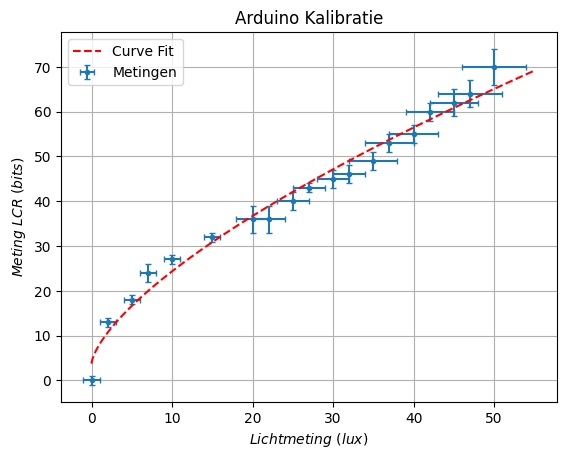

In [2]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
plt.figure()
plt.title('Arduino Kalibratie')
plt.errorbar(phyphox_meting,lcr_metingen,xerr=phyphox_std,yerr=lcr_std,fmt='.',capsize=2,label='Metingen')
plt.plot(x_test,fit(x_test,*popt1),'r--',label='Curve Fit')
plt.xlabel('$Lichtmeting \ (lux)$')
plt.ylabel('$Meting \ LCR \ (bits)$')
plt.grid()
plt.legend()
plt.show()


## *Opdracht 7*: Iteratie nodig?

Vervang deze tekst door jouw antwoord.
we did redid the readings between 30 and 10 Lux with alternating steps of 2-3 Lux since we found that the data collected was insufficient and did not support the accuracy of our non-linear curvefit

## *Opdracht 8*: Conclusie, leerdoel
we met the goals we set for the design assignment, the large unncertainty that is seen does not matter much in this senario because it is not a scientific setting but rather a child's bedroom night light, thus high accuraccy unnecessary, as long as it can get within our bounds of +-10 Lux 

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 1 beheersen.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
sensor lies taped to the bottom of the box, the phone sensor camera pointed facing down towards the bottom of the box, the light in the setup is varried by closing/opening the lid to the sensor and camera, the ammount it'll be opened will be determined by the luminance dispalyed on the phone, and will be controlled through the use of a stick to prop the box open and keep the lid steady, and will run between 50 and 0 Lux. the box was also taped to the desk to prevent unwanted movement/sliding that could throw off the data collection
 ![Alt](experimentsetup.png "meetopstelling student")
 ![Alt](experimentsetup2.png "meetopstelling student")
 ![Alt](experimentsetup3.png "meetopstelling student")


### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 2 beheersen.
## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Lichtsensor | nacht licht | needs to go below 30 +-10 Lux before turning light on, easy to plug in to socket, way to turn off light with button |
|Lichtsensor| water light sensor | withstand pressur (4bar) , measure light between 0 and 33meters underwater (0-25,000 +-1lux)|
|Lichtsensor| plant light sensor | needs to see entire visible spectrum (380-780nm), measure in lumens, have a determined minimum and maximum light for plant types (bvb basil needs 10,000-25,000 lux) |
|tempsensor| motor temp sensor | hight temps (~500c) withstand, easy to modifify, vibration restistant up to 20gs force, measures -50-450c +-.1c|
|Tempsensor | fan sensor| turn on fan past 25c +-.1, be able to stay on for long periods (6 months)|
|Tempsenor | plant heat | connected to alarm for hot and cold temps (-20c-50c +-.01C), app verbinding, easy to use|
|Druk sensor | headphones| needs to be small - less than 2 cm, give off a sound if too tight or loose(1.3-4.5N+-.5N) |
|druk sensor | helmet sensors | multiple sensors around helmet to measure collisions that occur in sports, way to send info to computer wireless, able to precisely measure (-100-100gs +-1e-2g), able to give off an alarm when too much force occurs (90gs+-1e-2g) |
|Druk sensor | car tire sensor | tells when tire has too much pressure or needs more air(dependent on model though usullay 27-33psi), measures between 0-50psi +-.1psi interfaces with car system easily, with stands vibration(50g), heat (-20-90c), and 10 years use |

Groep 26 heeft gekozen voor sensor light sensor--night light. 

### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

19 19 19 19


<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:38: SyntaxWarning: invalid escape sequence '\ '
<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:38: SyntaxWarning: invalid escape sequence '\ '
/var/folders/9f/d_xndn2x1bx85yglm7bqd74c0000gn/T/ipykernel_42976/3158241194.py:37: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$Lichtmeting \ (lux)$')
/var/folders/9f/d_xndn2x1bx85yglm7bqd74c0000gn/T/ipykernel_42976/3158241194.py:38: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$Meting \ LCR \ (bits)$')
/var/folders/9f/d_xndn2x1bx85yglm7bqd74c0000gn/T/ipykernel_42976/3158241194.py:20: RuntimeWarning: divide by zero encountered in log
  return (a*np.log(b)+c)
/var/folders/9f/d_xndn2x1bx85yglm7bqd74c0000gn/T/ipykernel_42976/3158241194.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  popt,pcov = curve_fit(funct,phyphox_meting,lcr_metingen)


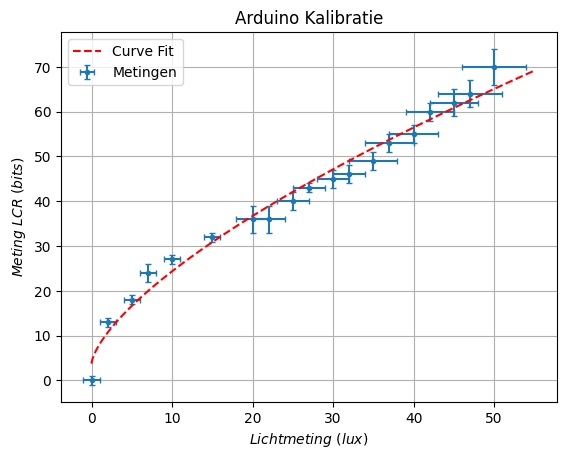

In [3]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

lcr_metingen = np.array([76,73,70,64,61,56,47,34,22,17,3])
lcr_std = np.array([2,2,1,1,1,1,2,3,2,2,1])
phyphox_meting = np.array([50,45,40,35,30,25,20,15,10,5,0])
phyphox_std = np.array([3,3,3,3,2,2,2,2,1,1,0])

lcr_metingen = np.array([70,64,62,60,55,53,49,46,45,43,40,36,36,32,27,24,18,13,0])
lcr_std = np.array([4,3,3,2,2,2,2,2,2,1,2,3,3,1,1,2,1,1,1])
phyphox_meting = np.array([50,47,45,42,40,37,35,32,30,27,25,22,20,15,10,7,5,2,0])
phyphox_std = np.array([4,4,3,3,3,3,3,2,2,2,2,2,2,1,1,1,1,1,1])

print(len(lcr_metingen),len(lcr_std),len(phyphox_meting),len(phyphox_std))

#fitting
def funct(b,a,c):
    return (a*np.log(b)+c)
popt,pcov = curve_fit(funct,phyphox_meting,lcr_metingen)
a_fit,b_fit=popt
V_plot=np.linspace(min(phyphox_meting),max(phyphox_meting),500)
P_plot=funct(V_plot,a_fit,b_fit)

def fit(x,A,B,C):
    return A * x**B + C
x_test = np.linspace(0,55,1000)
popt1,pcov1 = curve_fit(fit,phyphox_meting,lcr_metingen)
#lcr_std = np.abs(fit(phyphox_meting,*popt1) - lcr_metingen)
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
plt.figure()
plt.title('Arduino Kalibratie')
plt.errorbar(phyphox_meting,lcr_metingen,xerr=phyphox_std,yerr=lcr_std,fmt='.',capsize=2,label='Metingen')
plt.plot(x_test,fit(x_test,*popt1),'r--',label='Curve Fit')
plt.xlabel('$Lichtmeting \ (lux)$')
plt.ylabel('$Meting \ LCR \ (bits)$')
plt.grid()
plt.legend()
plt.show()
## *Opdracht 8*: Conclusie, leerdoel


 ![Alt](experimentsetup2.png "meetopstelling student")
## *Opdracht 8*: Conclusie, leerdoel
we met the goals we set for the design assignment, the large unncertainty that is seen does not matter much in this senario because it is not a scientific setting but rather a child's bedroom night light, thus high accuraccy unnecessary, as long as it can get within our bounds of +-10 Lux 